In [1]:
set.seed(43)

In [3]:
data = arima.sim(list(order = c(2,0,0), ar = c(0.7,-0.2)), n = 2000)

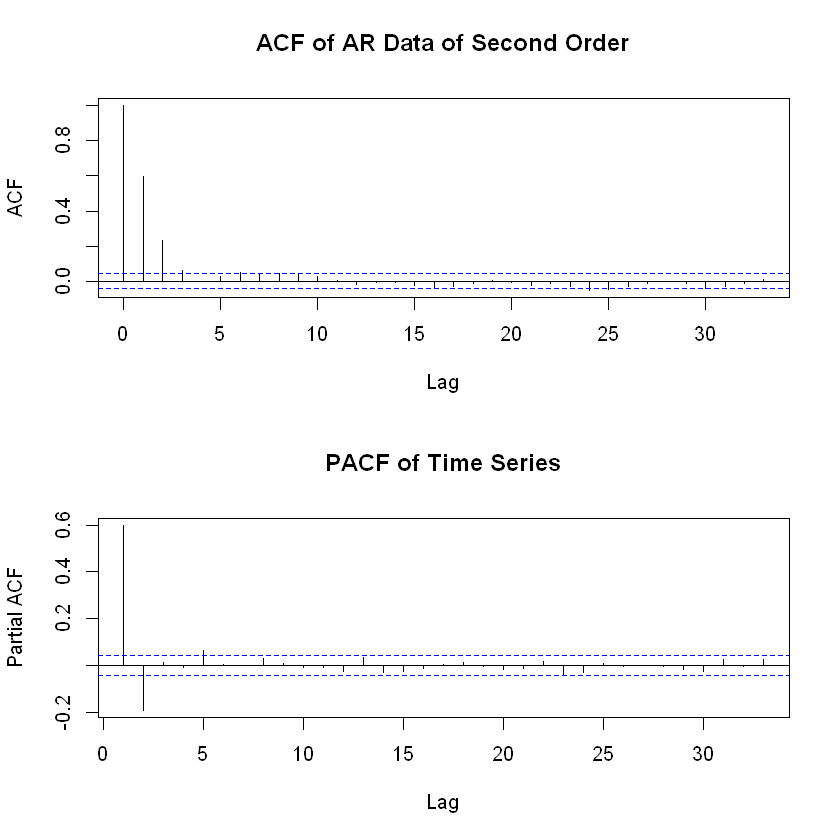

In [5]:
par(mfrow = c(2,1))
acf(data, main = "ACF of AR Data of Second Order")
acf(data, type = "partial", main = "PACF of Time Series")

In [10]:
arima(data, order = c(2,0,0), include.mean = FALSE)
# tHIS COMMAND WILL GIVE US THE COEFFITIENT OF THE AR(P) PROCESS AS LONG AS WE GIVE THE ORDER


Call:
arima(x = data, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7111  -0.1912
s.e.  0.0219   0.0220

sigma^2 estimated as 0.9985:  log likelihood = -2836.64,  aic = 5679.27

In [18]:
SSE = NULL
AIC = NULL
for(p in 1:5){
    m = arima(data, order = c(p,0,0), include.mean = FALSE)
    SSE[p] = sum(resid(m)^2)
    AIC[p] = m$aic
    print(m$coef)
    print(paste(m$aic,sum(resid(m)^2)))
}

      ar1 
0.5969948 
[1] "5751.73196762524 2072.83193501059"
       ar1        ar2 
 0.7111457 -0.1911552 
[1] "5679.27375222458 1997.00667996082"
        ar1         ar2         ar3 
 0.71359315 -0.20027406  0.01281966 
[1] "5680.94495534325 1996.67791506654"
         ar1          ar2          ar3          ar4 
 0.713676747 -0.201599645  0.017553047 -0.006629412 
[1] "5682.85704377107 1996.58997811327"
        ar1         ar2         ar3         ar4         ar5 
 0.71410825 -0.20268672  0.03019322 -0.05154692  0.06293048 
[1] "5676.91730818182 1988.65973372245"


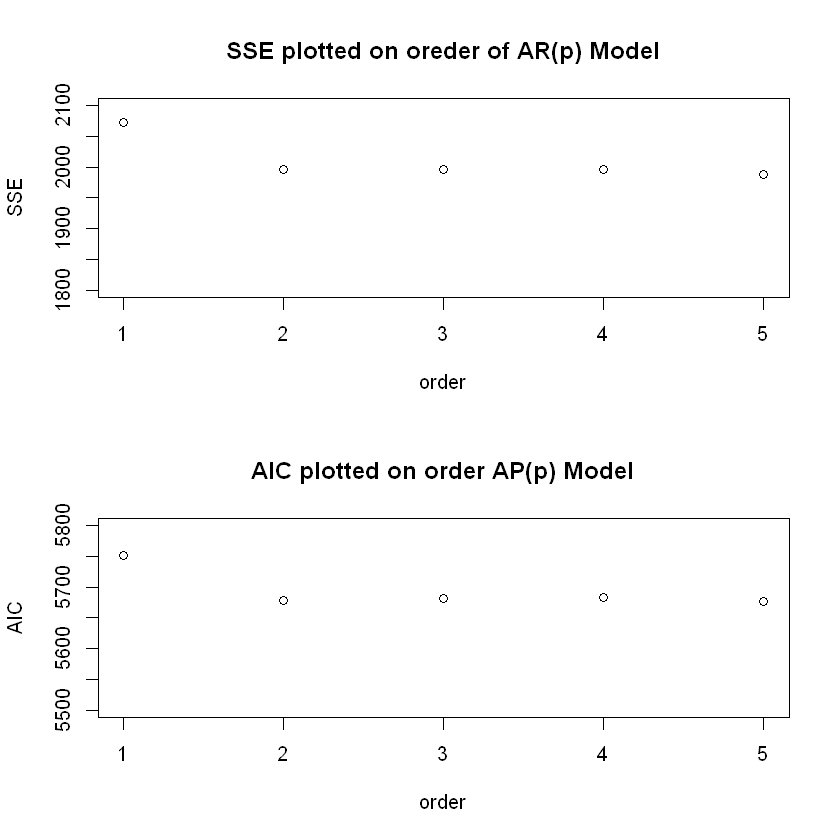

In [25]:
par(mfrow = c(2,1))
order = c(1,2,3,4,5)
plot(SSE~order,main = "SSE plotted on oreder of AR(p) Model", ylim = c(1800, 2100))
plot(AIC~order, main = "AIC plotted on order AP(p) Model",ylim = c(5500,5800))

Adding more terms reduces the SSE, but the really big drop occurs when we move from p=1to p=2.

After  that,  the  enhancements  are  really  much  more  modest.  There  seems  to  be  a  tradeoff between added complexity and a meager diminution of the SSE.

Based on theseplotswe would select a 2ndorder model.

initial  value 5.968253 
iter   2 value 5.813501
iter   3 value 5.809452
iter   4 value 5.805777
iter   5 value 5.805632
iter   6 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
final  value 5.805618 
converged
initial  value 5.796764 
iter   2 value 5.792329
iter   3 value 5.791962
iter   4 value 5.791909
iter   4 value 5.791909
iter   4 value 5.791909
final  value 5.791909 
converged


,Estimate,SE,t.value,p.value
ma1,-0.4303,0.1228,-3.5037,9e-04
sma1,-0.5528,0.1784,-3.0991,3e-03


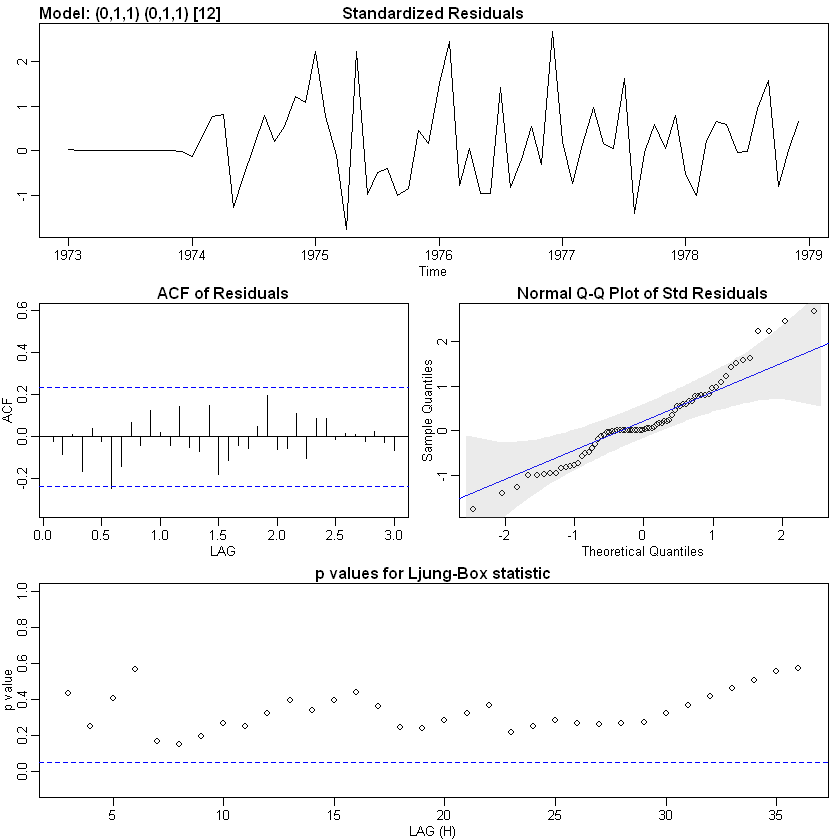

In [1]:
library(astsa)

model<-sarima(USAccDeaths, 0,1,1,0,1,1,12)
model$ttable